In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

d:\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
d:\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
weekly_return  = pd.read_excel("E://Flexible_proj_lab/broad_assets_weekly_rets.xlsx")
weekly_return

,Date,Asset 1,Asset 2,Asset 3,Asset 4,Asset 5,Asset 6,Asset 7,Asset 8,Asset 9,Asset 10,Asset 11
0,2000-07-31,0.015154,0.075677,-0.002266,0.000897,0.042162,0.004952,0.037313,0.002093,-0.002477,-0.008385,-0.031787
1,2000-08-07,0.067870,0.052623,0.015929,0.013358,0.036514,-0.023689,-0.019612,-0.011556,0.024090,-0.026565,0.034584
2,2000-08-14,0.015698,0.002262,0.015185,0.006338,0.017116,0.025353,0.029392,0.036872,0.008525,0.006253,0.048137
3,2000-08-21,0.009488,0.056625,-0.001838,-0.000252,0.006775,-0.026410,0.001619,-0.002437,0.007701,0.001821,0.038370
4,2000-08-28,0.018391,0.065276,0.001894,0.004126,0.037931,-0.035294,0.019534,-0.017000,0.001856,-0.009469,0.031318
...,...,...,...,...,...,...,...,...,...,...,...,...
1253,2024-08-12,0.060689,0.071826,-0.044042,-0.014738,0.020995,0.042517,0.043057,0.088217,0.009326,0.050343,0.058296
1254,2024-08-19,0.100581,0.134610,0.019896,-0.000441,0.103698,0.032142,0.093122,0.077077,-0.023833,0.023948,-0.037742
1255,2024-08-26,0.002016,-0.026628,0.002796,0.006442,0.045003,0.054048,0.029013,-0.017973,-0.019513,0.009670,0.033216
1256,2024-08-30,0.010834,0.005016,-0.030972,-0.009397,-0.000694,0.009146,0.012656,-0.005479,0.017512,-0.012593,-0.034825


In [3]:
date = np.array(weekly_return['Date'])

First, I get the benchmark: in each week, equally weighted these 11 assets, and generate the return curve

In [4]:
week_return_df = weekly_return.set_index('Date')
week_return_df

,Asset 1,Asset 2,Asset 3,Asset 4,Asset 5,Asset 6,Asset 7,Asset 8,Asset 9,Asset 10,Asset 11
Date,,,,,,,,,,,
2000-07-31,0.015154,0.075677,-0.002266,0.000897,0.042162,0.004952,0.037313,0.002093,-0.002477,-0.008385,-0.031787
2000-08-07,0.067870,0.052623,0.015929,0.013358,0.036514,-0.023689,-0.019612,-0.011556,0.024090,-0.026565,0.034584
2000-08-14,0.015698,0.002262,0.015185,0.006338,0.017116,0.025353,0.029392,0.036872,0.008525,0.006253,0.048137
2000-08-21,0.009488,0.056625,-0.001838,-0.000252,0.006775,-0.026410,0.001619,-0.002437,0.007701,0.001821,0.038370
2000-08-28,0.018391,0.065276,0.001894,0.004126,0.037931,-0.035294,0.019534,-0.017000,0.001856,-0.009469,0.031318
...,...,...,...,...,...,...,...,...,...,...,...
2024-08-12,0.060689,0.071826,-0.044042,-0.014738,0.020995,0.042517,0.043057,0.088217,0.009326,0.050343,0.058296
2024-08-19,0.100581,0.134610,0.019896,-0.000441,0.103698,0.032142,0.093122,0.077077,-0.023833,0.023948,-0.037742
2024-08-26,0.002016,-0.026628,0.002796,0.006442,0.045003,0.054048,0.029013,-0.017973,-0.019513,0.009670,0.033216


In [5]:
equally_weighted = week_return_df*(1/11)
equally_weighted = equally_weighted.sum(axis=1)
equally_weighted

Date
2000-07-31    0.012121
2000-08-07    0.014868
2000-08-14    0.019194
2000-08-21    0.008315
2000-08-28    0.010779
                ...   
2024-08-12    0.035135
2024-08-19    0.047551
2024-08-26    0.010735
2024-08-30   -0.003527
2024-09-06   -0.042297
Length: 1258, dtype: float64

In [6]:
portfolio_return = equally_weighted.values

In [7]:
def calculate_cum_return(ret):
    res = []
    cum_sum = 1
    for i in range(len(ret)):
        cum_sum = cum_sum*(1+ret[i])
        res.append(cum_sum)
    return res

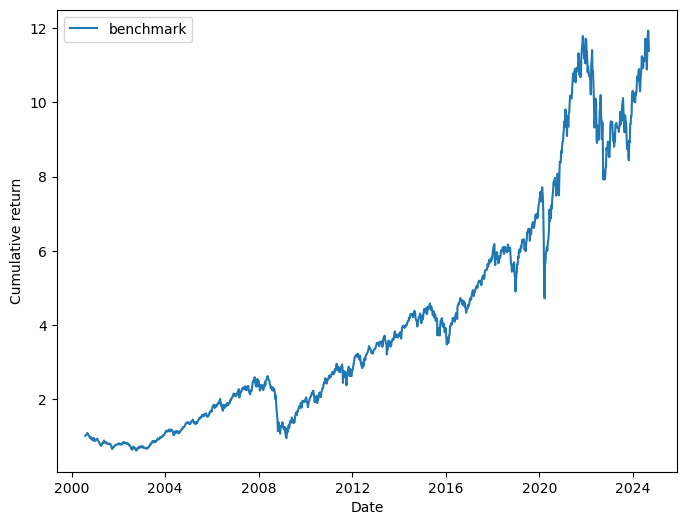

In [8]:
x = date
y = calculate_cum_return(portfolio_return)
fig = plt.figure(figsize=(8,6))
plt.plot(x, y, label='benchmark')
plt.xlabel('Date')
plt.ylabel('Cumulative return')
#plt.xticks(ticks = range(0, 1258, 200), rotation=45)
plt.legend()

In [9]:
def calculate_summary_statistics(ret, annual_factor):
    summary_statistics = pd.DataFrame({})
    summary_statistics['Mean'] = [ret.mean()*annual_factor]
    summary_statistics['Vol'] = [ret.std()*np.sqrt(annual_factor)]
    summary_statistics['Sharpe'] = ((ret-ret.mean()).mean()/(ret-ret.mean()).std())*np.sqrt(annual_factor)
    summary_statistics['Skewness'] = [ret.skew()]
    summary_statistics['Kurtosis'] = [ret.kurtosis()]
    return summary_statistics

In [10]:
summary_data = calculate_summary_statistics(equally_weighted, 12)
summary_data

,Mean,Vol,Sharpe,Skewness,Kurtosis
0,0.02967,0.113281,7.128398e-17,-0.124334,7.099889


(1) In each new week, invest in the asset that has the highest return last week, to see the portfolio's performance

In [95]:
week_return_df

,Asset 1,Asset 2,Asset 3,Asset 4,Asset 5,Asset 6,Asset 7,Asset 8,Asset 9,Asset 10,Asset 11
Date,,,,,,,,,,,
2000-07-31,0.015154,0.075677,-0.002266,0.000897,0.042162,0.004952,0.037313,0.002093,-0.002477,-0.008385,-0.031787
2000-08-07,0.067870,0.052623,0.015929,0.013358,0.036514,-0.023689,-0.019612,-0.011556,0.024090,-0.026565,0.034584
2000-08-14,0.015698,0.002262,0.015185,0.006338,0.017116,0.025353,0.029392,0.036872,0.008525,0.006253,0.048137
2000-08-21,0.009488,0.056625,-0.001838,-0.000252,0.006775,-0.026410,0.001619,-0.002437,0.007701,0.001821,0.038370
2000-08-28,0.018391,0.065276,0.001894,0.004126,0.037931,-0.035294,0.019534,-0.017000,0.001856,-0.009469,0.031318
...,...,...,...,...,...,...,...,...,...,...,...
2024-08-12,0.060689,0.071826,-0.044042,-0.014738,0.020995,0.042517,0.043057,0.088217,0.009326,0.050343,0.058296
2024-08-19,0.100581,0.134610,0.019896,-0.000441,0.103698,0.032142,0.093122,0.077077,-0.023833,0.023948,-0.037742
2024-08-26,0.002016,-0.026628,0.002796,0.006442,0.045003,0.054048,0.029013,-0.017973,-0.019513,0.009670,0.033216


In [96]:
max_ind = week_return_df.values.argmax(axis=1)

In [97]:
new_date = date[1:]
max_ind = max_ind[0:-1]

In [98]:
return_array = week_return_df.values[1:, :] # the array that I will run loop on

In [99]:
ret_array = []
for i in range(len(new_date)):
    ret_array.append(return_array[i][max_ind[i]])

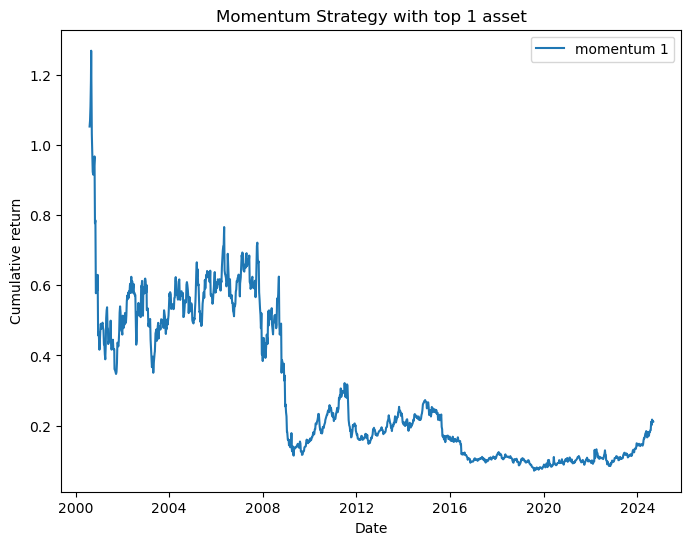

In [100]:
x = new_date
y = calculate_cum_return(ret_array)
fig = plt.figure(figsize=(8,6))
plt.plot(x, y, label='momentum 1')
plt.xlabel('Date')
plt.ylabel('Cumulative return')
plt.title("Momentum Strategy with top 1 asset")
#plt.xticks(ticks = range(0, 1258, 200), rotation=45)
plt.legend()

In [102]:
ret_array = pd.Series(ret_array)
ret_array

0       0.052623
1       0.015698
2       0.038370
3       0.065276
4       0.072790
          ...   
1252   -0.044042
1253    0.077077
1254   -0.026628
1255    0.009146
1256   -0.009530
Length: 1257, dtype: float64

In [103]:
summary_data = calculate_summary_statistics(ret_array, 12)
summary_data # The volatility is high

,Mean,Vol,Sharpe,Skewness,Kurtosis
0,0.002986,0.186401,3.980218e-17,-0.401735,5.338268


(2) choose the lookback period to be 4 weeks (1 month), still choose to invest on the asset with top momentum

In [104]:
week_return_df

,Asset 1,Asset 2,Asset 3,Asset 4,Asset 5,Asset 6,Asset 7,Asset 8,Asset 9,Asset 10,Asset 11
Date,,,,,,,,,,,
2000-07-31,0.015154,0.075677,-0.002266,0.000897,0.042162,0.004952,0.037313,0.002093,-0.002477,-0.008385,-0.031787
2000-08-07,0.067870,0.052623,0.015929,0.013358,0.036514,-0.023689,-0.019612,-0.011556,0.024090,-0.026565,0.034584
2000-08-14,0.015698,0.002262,0.015185,0.006338,0.017116,0.025353,0.029392,0.036872,0.008525,0.006253,0.048137
2000-08-21,0.009488,0.056625,-0.001838,-0.000252,0.006775,-0.026410,0.001619,-0.002437,0.007701,0.001821,0.038370
2000-08-28,0.018391,0.065276,0.001894,0.004126,0.037931,-0.035294,0.019534,-0.017000,0.001856,-0.009469,0.031318
...,...,...,...,...,...,...,...,...,...,...,...
2024-08-12,0.060689,0.071826,-0.044042,-0.014738,0.020995,0.042517,0.043057,0.088217,0.009326,0.050343,0.058296
2024-08-19,0.100581,0.134610,0.019896,-0.000441,0.103698,0.032142,0.093122,0.077077,-0.023833,0.023948,-0.037742
2024-08-26,0.002016,-0.026628,0.002796,0.006442,0.045003,0.054048,0.029013,-0.017973,-0.019513,0.009670,0.033216


In [138]:
rolling_cumulative_return = (1+week_return_df).rolling(4).apply(lambda x:x.prod(), raw=True)-1
rolling_cumulative_return = rolling_cumulative_return.iloc[3:, :]
rolling_cumulative_return

,Asset 1,Asset 2,Asset 3,Asset 4,Asset 5,Asset 6,Asset 7,Asset 8,Asset 9,Asset 10,Asset 11
Date,,,,,,,,,,,
2000-08-21,0.111516,0.199105,0.027128,0.020438,0.106148,-0.020549,0.048556,0.024533,0.038196,-0.026923,0.090202
2000-08-28,0.115060,0.187510,0.031411,0.023730,0.101658,-0.059773,0.030584,0.005013,0.042706,-0.027986,0.161257
2000-09-01,0.052952,0.210261,0.030280,0.026192,0.125389,-0.040032,0.082630,0.007234,0.017783,0.016291,0.158588
2000-09-11,-0.007163,-0.019285,-0.000189,0.010931,0.071647,0.007699,-0.046017,-0.090761,0.085475,-0.015469,0.167667
2000-09-18,-0.075791,-0.133965,-0.035129,0.008393,-0.004236,-0.022233,-0.067967,-0.193624,0.090560,-0.030235,0.158189
...,...,...,...,...,...,...,...,...,...,...,...
2024-08-12,-0.105187,-0.181724,0.083065,0.040281,-0.120469,0.053247,-0.069961,-0.088966,-0.017999,0.035313,-0.059570
2024-08-19,0.009949,-0.015663,0.114730,0.044766,-0.055752,0.049787,0.024315,0.026236,-0.044218,0.084959,-0.052230
2024-08-26,0.051389,0.039181,0.101552,0.040118,-0.024144,0.102887,0.086782,0.051853,-0.067830,0.108472,0.026589


In [157]:
return_dat = rolling_cumulative_return.values
return_dat

array([[ 0.11151588,  0.19910487,  0.02712799, ...,  0.03819645,
        -0.02692255,  0.09020163],
       [ 0.11505975,  0.1875105 ,  0.0314106 , ...,  0.0427061 ,
        -0.0279858 ,  0.16125747],
       [ 0.05295229,  0.21026082,  0.03027976, ...,  0.01778336,
         0.01629124,  0.15858792],
       ...,
       [ 0.05138912,  0.03918064,  0.10155167, ..., -0.0678299 ,
         0.10847158,  0.02658898],
       [ 0.18240104,  0.18965869, -0.0525778 , ..., -0.01703882,
         0.07222181,  0.01553722],
       [ 0.02099849, -0.01903151,  0.0568552 , ..., -0.03540235,
         0.01496245, -0.11649293]])

In [106]:
max_ind = rolling_cumulative_return.values.argmax(axis=1)
max_ind = max_ind[0:-1]

In [109]:
new_date = date[4:]

In [111]:
return_array = rolling_cumulative_return.values[1:, :]

In [112]:
ret_array = []
for i in range(len(new_date)):
    ret_array.append(return_array[i][max_ind[i]])

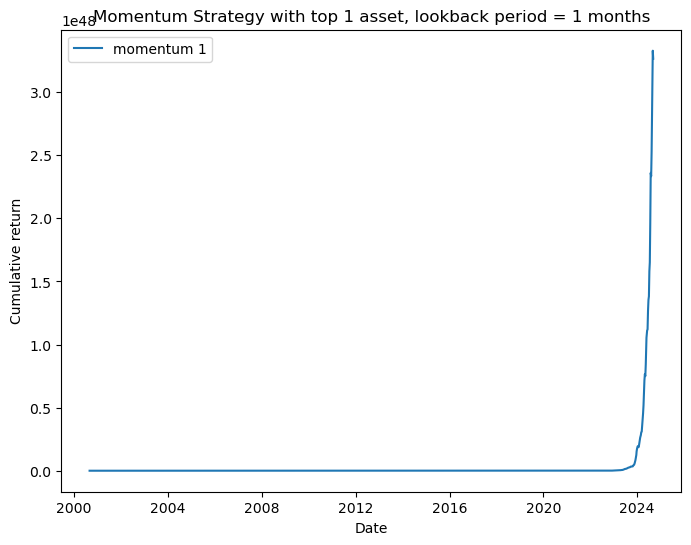

In [114]:
x = new_date
y = calculate_cum_return(ret_array)
fig = plt.figure(figsize=(8,6))
plt.plot(x, y, label='momentum 1')
plt.xlabel('Date')
plt.ylabel('Cumulative return')
plt.title("Momentum Strategy with top 1 asset, lookback period = 1 months")
#plt.xticks(ticks = range(0, 1258, 200), rotation=45)
plt.legend()

In [115]:
ret_array = pd.Series(ret_array)
ret_array

0       0.187510
1       0.210261
2      -0.019285
3       0.158189
4       0.065415
          ...   
1249    0.083065
1250    0.114730
1251    0.101552
1252    0.072222
1253   -0.019032
Length: 1254, dtype: float64

In [116]:
summary_data = calculate_summary_statistics(ret_array, 12)
summary_data

,Mean,Vol,Sharpe,Skewness,Kurtosis
0,1.157764,0.302055,-8.441498e-17,1.169786,4.469325


(3) In next steps, I will design a function to handle the momentum strategy, the parameters include the lookback periods (in weeks), top K assets (K is the parameter), and may further contain something like transaction cost...

In [176]:
def momentum_strategy(look_back, K=1): # look back period and the number of top performance assets to choose 
    rolling_cumulative_return = (1+week_return_df).rolling(look_back).apply(lambda x:x.prod(), raw=True)-1
    rolling_cumulative_return = rolling_cumulative_return.iloc[look_back-1:, :]
    #max_ind = rolling_cumulative_return.values.argmax(axis=1)[0:-1]
    return_data = rolling_cumulative_return.values
    arg_ind = np.argsort(-return_data, axis=1)[:, 0:K] # the index of the top K assets in each week
    new_date = date[look_back:]
    return_array = rolling_cumulative_return.values[1:, :]
    ret_array = []
    for i in range(len(new_date)):
        # ret_array.append(return_array[i][max_ind[i]])
        ret = 0
        for j in range(return_array.shape[1]): # go over j from 0 to K-1
            if j in arg_ind[i]: # add this asset
                ret += return_array[i][j]/K # equally weighted these K assets
        ret_array.append(ret)
    y = calculate_cum_return(ret_array)
    fig = plt.figure(figsize=(8,6))
    plt.plot(new_date, y, label=f'momentum {K}')
    plt.xlabel('Date')
    plt.ylabel('Cumulative return')
    plt.title(f"Momentum Strategy with top {K} asset, lookback period = {look_back} weeks")
    #plt.xticks(ticks = range(0, 1258, 200), rotation=45)
    plt.legend()
    retu_array = pd.Series(ret_array)
    summary_data = calculate_summary_statistics(retu_array, 12)
    return summary_data

,Mean,Vol,Sharpe,Skewness,Kurtosis
0,2.712513,0.532749,-6.743577e-16,1.956207,10.761875


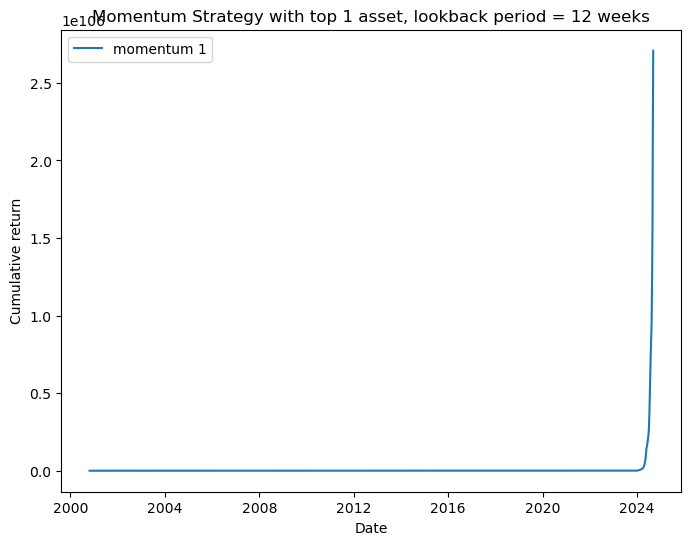

In [177]:
momentum_strategy(12) # lookback period is 3 months, top 1 assets

,Mean,Vol,Sharpe,Skewness,Kurtosis
0,0.012995,0.114994,-2.765038e-17,-0.418193,5.002511


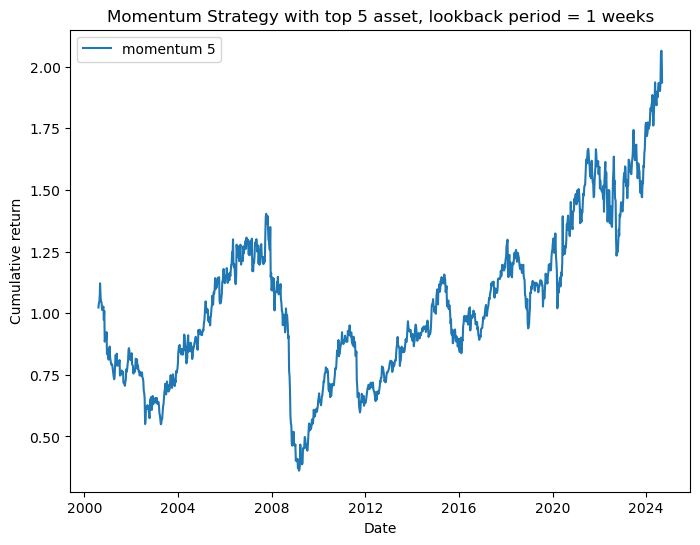

In [178]:
momentum_strategy(1, 5) # lookback period is one week, long the top 5 assets

,Mean,Vol,Sharpe,Skewness,Kurtosis
0,0.01364,0.12876,-1.646284e-17,-0.329212,4.450556


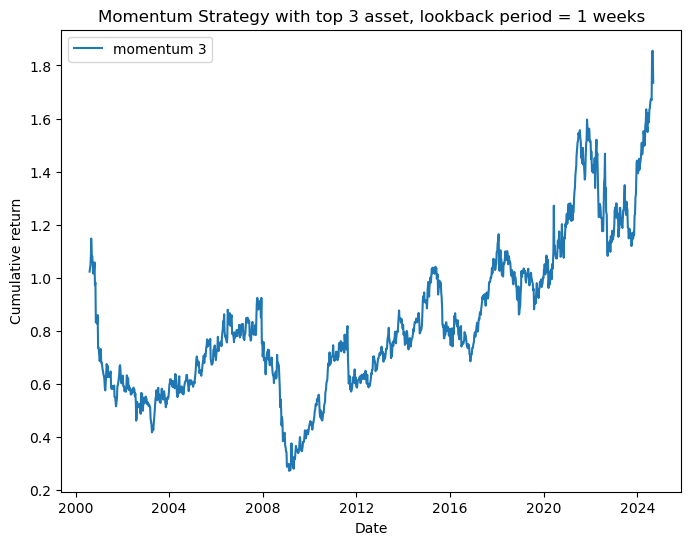

In [179]:
momentum_strategy(1, 3) # lookback period is one week, long the top 3 assets

,Mean,Vol,Sharpe,Skewness,Kurtosis
0,3.352713,0.640521,-1.402381e-15,1.963689,8.342846


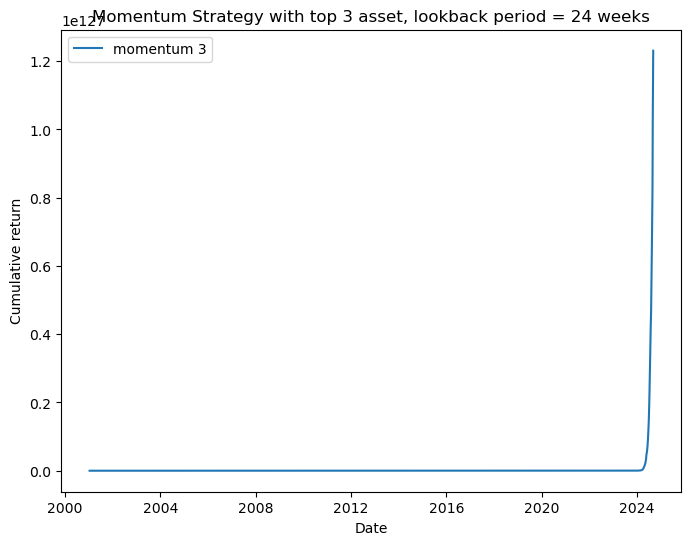

In [180]:
momentum_strategy(24, 3) # lookback period is 6 months, long the top 3 assets

,Mean,Vol,Sharpe,Skewness,Kurtosis
0,0.012712,0.144987,-5.117103e-17,-0.311226,4.268614


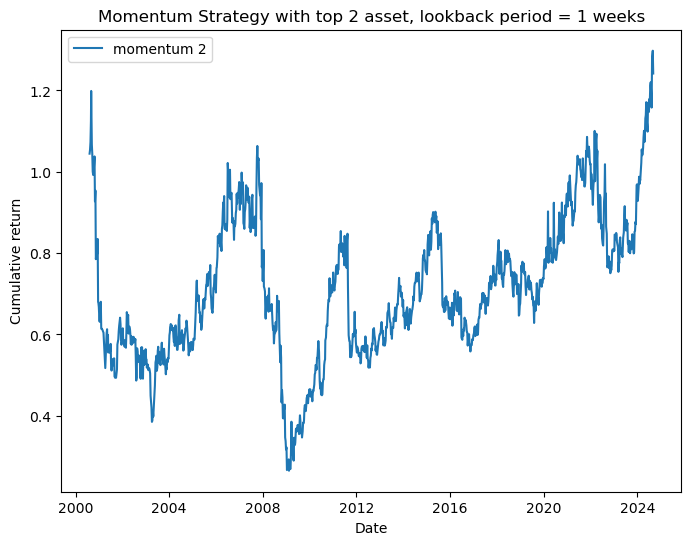

In [181]:
momentum_strategy(1, 2) # lookback period is 1 week, long the top 2 assets

In my above algorithm, the "K" is fixed in each week when I long the assets; Further, I may try to dymamically change "K" in each week. Also, my algorithm need to consider constrains like risks or transaction costs